# FA691 Homework 1
# Due: Wednesday, January 25 @ 11:59PM

Name: Ryan Shea

Date: 2023-01-22

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed of random number generator
CWID = 10445281 #Place here your Campus wide ID number, this will personalize
#your results, but still maintain the reproduceable nature of using seeds.
#If you ever need to reset the seed in this assignment, use this as your seed
#Papers that use -1 as this CWID variable will earn 0's so make sure you change
#this value before you submit your work.
personal = CWID % 10000
np.random.seed(personal)

## Question 1 (20pt)

### Question 1.1
An urn contains four type A coins and two type B coins. When a type A coin is flipped, it comes up heads with probability 1/3, whereas when a type B coin is flipped, it comes up heads with probability 1/2. A coin is randomly chosen (uniformly) from the urn and flipped. Given that the flip landed on heads, what is the probability that it was a type B coin?
  
Hint: Recall Bayes' theorem.

(Note that the following fields can be added wherever you desire to show a solution.  You can use the Markdown blocks for a written response, and the Code blocks for showing python code and its output.  Some questions will require just one, and some both.  I will not always provide you with these, but you can add them at your discretion wherever necessary.  If it makes sense to do the python code first then that's fine.  If you want to include multiple of each, that's ok too.  Do what you feel is necessary to answer the question fully.)

Bayes Theorem:
$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$

In this case, A is the probablity that it was a type B coin and B is the fact that it landed on heads.

$$P(B|A)$$
B is the fact that it landed on heads.  We know that the probability of a type B coin landing on heads is 1/2.  Therefore, $$P(B|A) = 1/2$$

$$ P(A) $$
A is the probability that it was a type B coin.  We know that there are 2 type B coins in the urn (out of 6).  Therefore, $$P(A) = 2/6 = 1/3$$

$$ P(B) $$
B is the fact that it landed on heads.  We know that the probability of a type A coin landing on heads is 1/3 and the probability of a type B coin landing on heads is 1/2.  Therefore, $$P(B) = (1/3 * 2/3) + (1/2 * 1/3) = 7/18$$

Putting it all together, we get:
$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)} = \frac{1/2 * 1/3}{7/18} = \frac{9}{21}$$

### Question 1.2
Simulate this system by sequentially sampling a coin and a flip. From 10,000 repeated simulations, what percentage of heads results came from a type B coin? Comment on your answer in comparison with the result you found in Question 1.1.

Simulated Probabilty: 0.4315498618437579


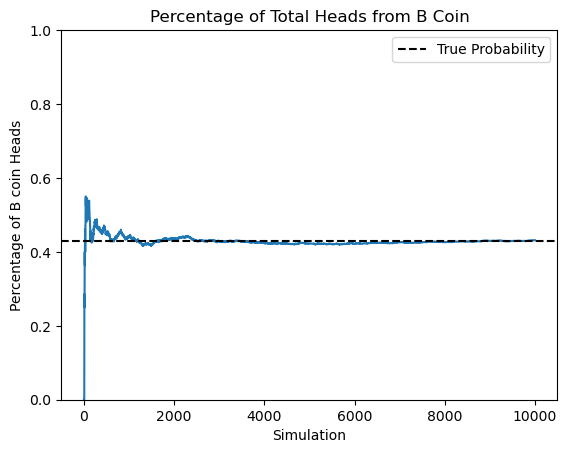

In [99]:
def system(trials):
    coins = np.array(["A", "A", "A", "A", "B", "B"])

    total_heads = 0
    total_b = 0
    prob = np.zeros(trials)

    for i in range(trials):
        pick = np.random.choice(coins)

        if pick == "B":
            res = np.random.choice([0, 1]) # 1 in 2 chance of being 1, or heads
            if res == 1: # if heads
                total_heads += 1
                total_b += 1

        else: # if the pick == "A"
            res = np.random.choice([0, 0, 1]) # 1 in 3 now
            if res == 1:
                total_heads += 1
        prob[i] = 0 if total_heads == 0 else total_b / total_heads 
    
    return prob[trials-1], prob # last probability, entire probability array

simulated_prob, prob_array = system(10000)
print(f"Simulated Probabilty: {simulated_prob}")

plt.plot(prob_array)
plt.title("Percentage of Total Heads from B Coin")
plt.xlabel("Simulation")
plt.ylabel("Percentage of B coin Heads")
plt.axhline(9/21, xmin=0, linestyle="--", color="black", label="True Probability")
plt.ylim(top=1, bottom=0)
plt.legend()
plt.show()

## Question 2 (10pt)

### Question 2.1
Generate a vector `x` containing 1,000 realizations of a random normal variable with mean 2 and variance 7. Plot a histogram of `x` using 35 bins.

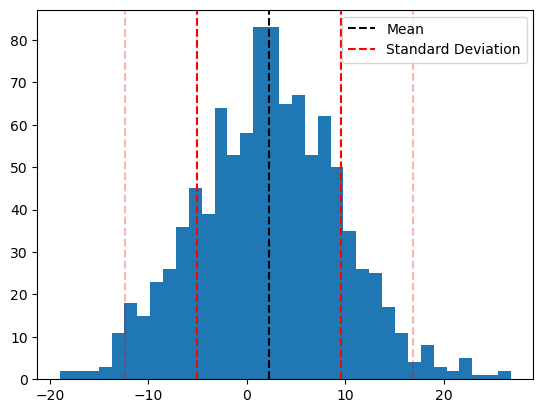

In [19]:
x = np.random.normal(loc=2, scale=7, size=1000)

plt.hist(x, bins=35)
plt.axvline(x.mean(), ymin=0, color='black', linestyle='--', label="Mean")
plt.axvline(x.mean() + x.std(), ymin=0, color='red', linestyle='--', label="Standard Deviation")
plt.axvline(x.mean() - x.std(), ymin=0, color='red', linestyle='--')
plt.axvline(x.mean() + 2*x.std(), ymin=0, color='red', linestyle='--', alpha=0.3)
plt.axvline(x.mean() - 2*x.std(), ymin=0, color='red', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

### Question 2.2
Calculate the mean and standard deviation of these 1,000 values. Do your answers make sense?

In [23]:
print(f"Mean: {x.mean()}\nStandard Deviation: {x.std()}")

Mean: 2.2359679339935807
Standard Deviation: 7.3067793877893275


These make sense as the mean is close to 2 and the standard deviation is close to 7. If I were to increase the observations they would come even closer.

### Question 2.3
Take out 10 random samples of 500 observations each (with replacement).  Create a vector of the means of each sample.  Calculate the mean of the sample means and the standard deviation of the sample means.  What do you observe about these results?

In [25]:
mu = np.zeros(10)
for i in range(len(mu)):
    mu[i] = np.random.choice(x, size=500, replace=True).mean()

print(mu, end='\n\n')
print(f"Mean: {mu.mean()}\nStandard Deviation: {mu.std()}")

[1.86327442 2.2343624  2.54428803 2.67210939 2.25133491 1.85075756
 2.2293444  1.9644816  2.07585966 2.21925731]

Mean: 2.1905069678858244
Standard Deviation: 0.25530422561596683


The mean is roughly equal to the population mean with a small standard deviation. Because of that, it makes sense.

## Question 3 (10pt)

## Question 3.1
Download stock price data for 4 stocks of your choice from January 1, 2020 through December 31, 2022. (All chosen stocks must have price data for the entire time period.) Find the mean and standard deviation of the daily log returns for each stock in your data set.  

In [29]:
import yfinance as yf
import pandas as pd

stocks = ['SPY', 'XLK', 'XLF', 'XLP']
# sp500, tech, financials, cons staples

df = pd.DataFrame()

for ticker in stocks:
    df[ticker] = yf.download(ticker, "2020-01-01", "2022-12-31")["Adj Close"]

print(df.head())

ret = df.apply(lambda x: np.log(x / x.shift(1))).dropna()

ret.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   SPY        XLK        XLF        XLP
Date                                                   
2020-01-02  309.694885  90.642471  29.158108  57.774704
2020-01-03  307.349823  89.623367  28.848515  57.682236
2020-01-06  308.522400  89.836891  28.829750  57.802448
2020-01-07  307.654877  89.798050  28.642120  57.358601
2020-01-08  309.294556  90.758957  28.829750  57.571274


,SPY,XLK,XLF,XLP
Date,,,,
2020-01-03,-0.007601,-0.011307,-0.010675,-0.001602
2020-01-06,0.003808,0.002380,-0.000651,0.002082
2020-01-07,-0.002816,-0.000432,-0.006529,-0.007708
2020-01-08,0.005315,0.010644,0.006529,0.003701
2020-01-09,0.006758,0.011272,0.006164,0.007042


In [31]:
print("Mean:")
print(ret.mean())
print("\nStandard Deviation")
print(ret.std())

Mean:
SPY    0.000279
XLK    0.000420
XLF    0.000211
XLP    0.000338
dtype: float64

Standard Deviation
SPY    0.015824
XLK    0.020199
XLF    0.020023
XLP    0.012657
dtype: float64
